In [3]:
import PyPDF2
import numpy as np
from nltk.sentiment import SentimentIntensityAnalyzer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Step 1: Extract text from the PDF
def extract_text_from_pdf(file_path):
    text = ""
    with open(file_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        for page in reader.pages:
            text += page.extract_text()
    return text

# Provide the path to your PDF file
pdf_file_path = 'sample-recommendation-letter.pdf'

# Extract text from the PDF
extracted_text = extract_text_from_pdf(pdf_file_path)

print(extracted_text)


  intellectual creativity necessary to complete an advanced graduate degree. I would therefore highly recommend Jane Doe. If her performance in my class is a good indication of how she would perform as a graduate student, she would be an extremely positive asset to your program. If I can be of any further assistance, or provide you with any further information, please do not hesitate to contact me. Yours sincerely, [sender’s signature] [sender’s name and title] 	f university]. I am a fifth-year Ph.D. student at the University of California, Berkeley. I came to know Jane when I was her Graduate Student Instructor for Philosophy 111: Ethical Relativism, taught by Professor John Smith. The course comprised [short description of course]. Jane distinguished herself by submitting an exceptionally well researched and interesting project on ethical practices in ancient Greece. I would rank her in the top 2% of students that I have taught in the past five years in respect of her writing ability

In [4]:
# Step 3: Prepare the data
# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts([extracted_text])
word_index = tokenizer.word_index

# Convert text to sequences
sequences = tokenizer.texts_to_sequences([extracted_text])

print(sequences)

[[51, 10, 52, 10, 53, 10, 54, 10, 55, 31, 32, 12, 17, 12, 33, 93, 23, 56, 18, 32, 12, 33, 94, 95, 34, 96, 12, 33, 97, 98, 23, 56, 18, 32, 12, 57, 99, 58, 100, 101, 35, 17, 35, 57, 58, 102, 35, 17, 59, 5, 103, 36, 104, 105, 36, 13, 60, 106, 5, 61, 7, 62, 14, 107, 5, 17, 4, 63, 37, 17, 4, 31, 15, 108, 8, 109, 110, 111, 112, 24, 37, 1, 31, 4, 113, 114, 15, 115, 5, 116, 7, 64, 15, 38, 6, 19, 24, 117, 14, 65, 66, 11, 118, 67, 25, 119, 120, 121, 1, 16, 122, 123, 124, 4, 16, 7, 125, 68, 25, 126, 20, 127, 26, 128, 2, 39, 40, 18, 11, 27, 3, 69, 70, 15, 21, 129, 6, 3, 1, 130, 131, 4, 71, 22, 15, 72, 67, 3, 1, 132, 133, 134, 3, 135, 4, 6, 136, 73, 2, 74, 28, 75, 7, 13, 41, 137, 2, 42, 43, 138, 28, 6, 40, 18, 11, 27, 3, 69, 70, 29, 6, 73, 5, 139, 8, 140, 141, 4, 1, 11, 27, 4, 142, 76, 143, 144, 2, 5, 77, 1, 78, 4, 145, 27, 14, 146, 11, 147, 9, 79, 8, 148, 39, 44, 4, 1, 149, 150, 4, 151, 2, 152, 45, 153, 2, 154, 64, 155, 156, 11, 78, 6, 75, 157, 13, 46, 158, 3, 6, 159, 14, 1, 16, 160, 30, 25, 161, 

In [5]:
from nltk.tokenize import RegexpTokenizer  
from nltk.stem.porter import PorterStemmer  
from nltk.corpus import stopwords  
import nltk  
nltk.download('stopwords') 

tokenizer=RegexpTokenizer(r'\w+')  
en_stopwords=set(stopwords.words('english'))  
ps=PorterStemmer()  

def getCleanedText(text):  
  texttext=text.lower()  
  #tokenize  
  tokens=tokenizer.tokenize(text)  
  new_tokens=[token for token in tokens if token not in en_stopwords]  
  stemmed_tokens=[ps.stem(tokens) for tokens in new_tokens]  
  clean_text=" ".join(stemmed_tokens)  
  return clean_text   

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
import csv

# Define the path of the CSV file
csv_file_path = 'recommendations.csv'

# Initialize empty lists for x_train and y_train
X_train = []
y_train = []

# Read the CSV file
with open(csv_file_path, 'r') as file:
    reader = csv.reader(file)
    next(reader)  # Skip the header row
    
    for row in reader:
        X_train.append(row[0])  # Assuming the recommendation column is in the first column
        y_train.append(row[2])  # Assuming the sentiment column is in the second column

# Print the extracted data
print("x_train:", X_train)
print("y_train:", y_train)


x_train: ['I highly recommend John as an exceptional undergraduate student. He has consistently demonstrated outstanding academic performance and a strong work ethic.', 'I regret to say that I cannot provide a positive recommendation for Sarah. Her academic performance has been consistently below average and she has not shown improvement over time.', 'I enthusiastically endorse Michael as an exceptional undergraduate student. He is highly motivated, actively engages in class, and consistently produces high-quality work.', 'I highly recommend John for his exceptional work ethic and dedication.', 'Sarah is a valuable asset to any team and I wholeheartedly endorse her.', "Michael's leadership skills and problem-solving abilities are remarkable.", 'I cannot recommend Lisa due to her consistent failure to meet expectations.', 'Alexandra is an excellent communicator and consistently delivers high-quality work.', 'James is a dedicated team player and always goes the extra mile.', "I am disapp

In [7]:
X_clean=[getCleanedText(j) for j in X_train]  
Xt_clean=[getCleanedText(j) for j in extracted_text]  

In [8]:
X_clean

['i highli recommend john except undergradu student he consist demonstr outstand academ perform strong work ethic',
 'i regret say i cannot provid posit recommend sarah her academ perform consist averag shown improv time',
 'i enthusiast endors michael except undergradu student he highli motiv activ engag class consist produc high qualiti work',
 'i highli recommend john except work ethic dedic',
 'sarah valuabl asset team i wholeheartedli endors',
 'michael leadership skill problem solv abil remark',
 'i cannot recommend lisa due consist failur meet expect',
 'alexandra excel commun consist deliv high qualiti work',
 'jame dedic team player alway goe extra mile',
 'i disappoint jennif perform cannot endors',
 'david posit attitud willing learn make outstand candid',
 'i cannot speak highli enough emili profession attent detail',
 'robert lack punctual unprofession behavior make hard recommend',
 'i write letter express utmost satisfact servic provid compani the staff highli profession

In [9]:
from sklearn.feature_extraction.text import CountVectorizer 

cv=CountVectorizer(ngram_range=(1,2))  
X_vect=cv.fit_transform(X_clean).toarray()  
X_vect  

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [10]:
from sklearn.feature_extraction.text import CountVectorizer


print(cv.get_feature_names_out())  
Xt_vect=cv.transform(Xt_clean).toarray()  

['abil' 'abil collabor' 'abil commend' 'abil lead' 'abil natur'
 'abil remark' 'abil strong' 'abil think' 'abil work' 'academ'
 'academ perform' 'achiev' 'achiev team' 'action' 'action difficulti'
 'activ' 'activ engag' 'adapt' 'adapt chang' 'adapt resist' 'addit'
 'addit organ' 'alexandra' 'alexandra excel' 'alexandra highli'
 'alexandra outstand' 'alexandra perform' 'alexandra she' 'alway'
 'alway eager' 'alway goe' 'alway will' 'analyt' 'analyt skill' 'anyon'
 'apart' 'apart other' 'appli' 'appli he' 'appli hi' 'appli she' 'asset'
 'asset organ' 'asset team' 'assist' 'attent' 'attent detail'
 'attent need' 'attitud' 'attitud consist' 'attitud eager' 'attitud lack'
 'attitud make' 'attitud she' 'attitud willing' 'attribut' 'attribut lack'
 'averag' 'averag shown' 'averag the' 'base' 'base perform' 'behavior'
 'behavior make' 'behavior ongo' 'believ' 'believ would' 'best' 'best the'
 'beyond' 'beyond ensur' 'beyond work' 'box' 'bring' 'bring fresh'
 'bring high' 'build' 'build strong'

In [11]:
from sklearn.naive_bayes import MultinomialNB

mlb = MultinomialNB()
mlb.fit(X_vect, y_train)
y_pred = mlb.predict(Xt_vect)
y_pred


array(['1', '1', '1', ..., '1', '1', '1'], dtype='<U1')

In [23]:
from sklearn.feature_extraction.text import CountVectorizer


# Initialize and fit the CountVectorizer for training data
cv = CountVectorizer(ngram_range=(1, 2))
X_vect = cv.fit_transform(X_clean).toarray()

# Print feature names for training data
print("Training feature names:", cv.get_feature_names())

# Transform the test data into an array
Xt_vect = cv.transform(Xt_clean).toarray()
print("Transformed test data:", Xt_vect)


AttributeError: 'CountVectorizer' object has no attribute 'get_feature_names'

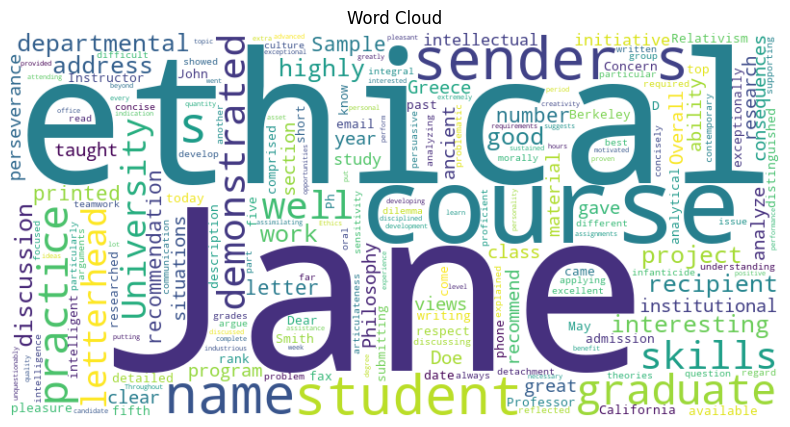

In [5]:
# Visualize the word cloud

import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(extracted_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()


In [6]:
# Step 2: Perform sentiment analysis
sid = SentimentIntensityAnalyzer()
sentiment_scores = sid.polarity_scores(extracted_text)
compound_score = sentiment_scores['compound']